In [1]:
# Python Libraries
%matplotlib inline
import pickle
import numpy as np
import pandas as pd
import matplotlib
from keras.datasets import cifar10
from keras import backend as K

# Custom Networks
from networks.lenet import LeNet

#from networks.pure_cnn import PureCnn
#from networks.network_in_network import NetworkInNetwork


from networks.resnet import ResNet


# Helper functions
from differential_evolution import differential_evolution
import helper
import attackHelper

matplotlib.style.use('ggplot')
np.random.seed(100)

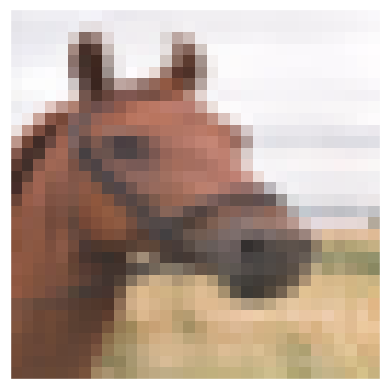

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
image_id = 99 # Image index in the test set
helper.plot_image(x_test[image_id])


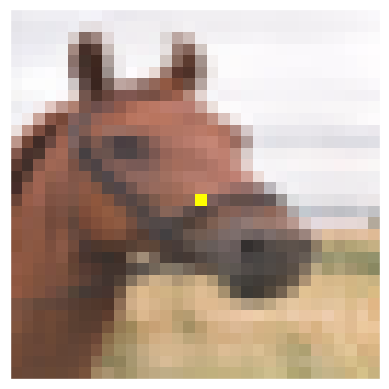

In [3]:
image_id = 99 # Image index in the test set
pixel = np.array([16, 16, 255, 255, 0]) # pixel = x,y,r,g,b
image_perturbed = helper.perturb_image(pixel, x_test[image_id])[0]

helper.plot_image(image_perturbed)

In [4]:
resnet = ResNet()
lenet = LeNet()
models = [resnet,lenet]
network_stats, correct_imgs = helper.evaluate_models(models, x_test, y_test)
correct_imgs = pd.DataFrame(correct_imgs, columns=['name', 'img', 'label', 'confidence', 'pred'])
network_stats = pd.DataFrame(network_stats, columns=['name', 'accuracy', 'param_count'])

network_stats

Successfully loaded resnet
Successfully loaded lenet
Evaluating  resnet ...
Evaluating  lenet ...


,name,accuracy,param_count
0,resnet,0.9173,470218
1,lenet,0.7522,71919


Confidence in true class ship is 0.9999894
Prior confidence was 0.9999069


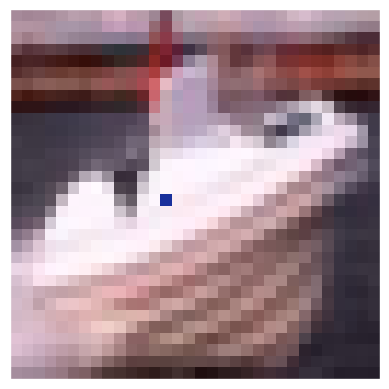

In [5]:
image_id = 108
pixel = np.array([16, 13,  25, 48, 156])
model = resnet

true_class = y_test[image_id, 0]
prior_confidence = model.predict_one(x_test[image_id])[true_class]
confidence = attackHelper.predict_classes(pixel, x_test[image_id], true_class, model)[0]

print('Confidence in true class', class_names[true_class], 'is', confidence)
print('Prior confidence was', prior_confidence)
helper.plot_image(helper.perturb_image(pixel, x_test[image_id])[0])


 lenet - image 7972 - 1 / 5


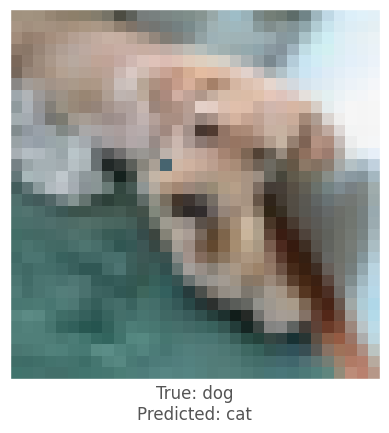


 lenet - image 1767 - 2 / 5


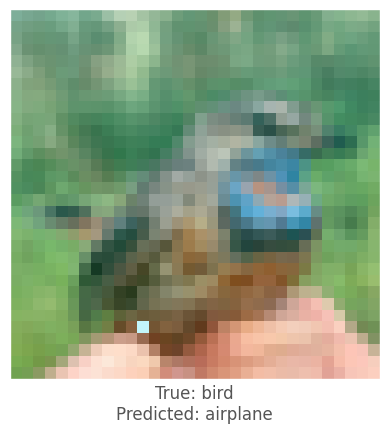


 lenet - image 8790 - 3 / 5


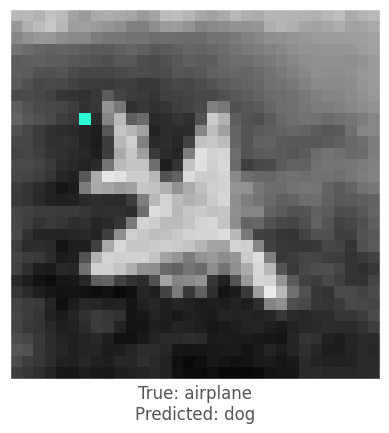


 lenet - image 4636 - 4 / 5


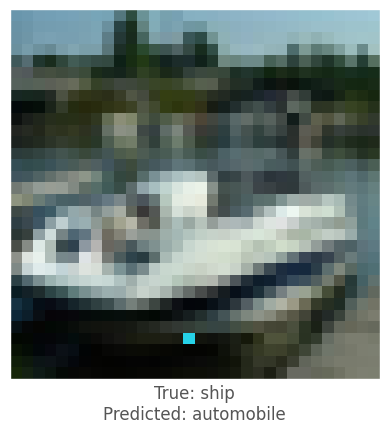


 lenet - image 3880 - 5 / 5


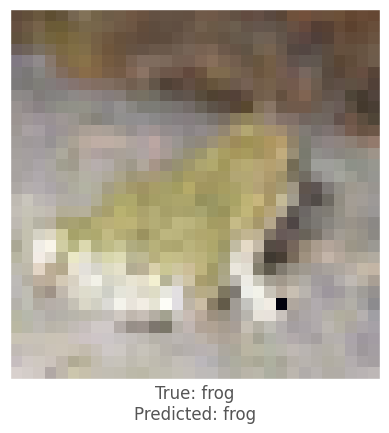

In [6]:
untargeted = attackHelper.attack_all(lenet,class_names,correct_imgs,x_test,y_test)

In [7]:
untargeted, targeted = helper.load_results()
columns = ['model', 'pixels', 'image', 'true', 'predicted', 'success', 'cdiff', 'prior_probs', 'predicted_probs', 'perturbation']
untargeted_results = pd.DataFrame(untargeted, columns=columns)

In [8]:
helper.attack_stats(untargeted_results, [lenet], network_stats)

,model,accuracy,pixels,attack_success_rate
